In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
FILE_FOLDER = '../prediction_data/%s'
AFTER_FILE_FOLDER = '../prediction_data/afterAnalysis/%s'

In [3]:
df_grid = pd.read_csv(FILE_FOLDER%'gridWeather_201701-201803.csv')
df_grid.head()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,beijing_grid_000,115.0,39.0,2017-01-01 00:00:00,-5.47,984.73,76.60,53.71,3.53
1,beijing_grid_001,115.0,39.1,2017-01-01 00:00:00,-5.53,979.33,75.40,43.59,3.11
2,beijing_grid_002,115.0,39.2,2017-01-01 00:00:00,-5.70,963.14,71.80,0.97,2.75
3,beijing_grid_003,115.0,39.3,2017-01-01 00:00:00,-5.88,946.94,68.20,327.65,3.84
4,beijing_grid_004,115.0,39.4,2017-01-01 00:00:00,-5.34,928.80,58.81,317.85,6.14


In [4]:
df_grid_selected = df_grid[df_grid['stationName']=='beijing_grid_303']
# df_grid_selected = df_grid
df_grid_selected['datetime'] = pd.to_datetime(df_grid_selected['utc_time'])
df_grid_selected.set_index(['stationName', 'datetime'], inplace=True)
df_grid_selected.head()

/Users/haomao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


longitude  latitude  \
stationName      datetime                                   
beijing_grid_303 2017-01-01 00:00:00      116.4      39.9   
                 2017-01-01 01:00:00      116.4      39.9   
                 2017-01-01 02:00:00      116.4      39.9   
                 2017-01-01 03:00:00      116.4      39.9   
                 2017-01-01 04:00:00      116.4      39.9   

                                                 utc_time  temperature  \
stationName      datetime                                                
beijing_grid_303 2017-01-01 00:00:00  2017-01-01 00:00:00        -5.82   
                 2017-01-01 01:00:00  2017-01-01 01:00:00        -3.36   
                 2017-01-01 02:00:00  2017-01-01 02:00:00        -0.90   
                 2017-01-01 03:00:00  2017-01-01 03:00:00         1.57   
                 2017-01-01 04:00:00  2017-01-01 04:00:00         2.72   

                                      pressure  humidity  wind_direction  \
stationName      datetime                                                  
beijing_grid_303 2017-01-01 00:00:00   1020.87     71.54          121.40   
                 2017-01-01 01:00:00   1020.76     60.87          128.12   
                 2017-01-01 02:00:00   1020.65     50.20          136.58   
                 2017-01-01 03:00:00   1020.54     39.54          147.01   
                 2017-01-01 04:00:00   1019.85     36.91          146.63   

                                      wind_speed/kph  
stationName      datetime                             
beijing_grid_303 2017-01-01 00:00:00            4.38  
                 2017-01-01 01:00:00            3.90  
                 2017-01-01 02:00:00            3.49  
                 2017-01-01 03:00:00            3.17  
                 2017-01-01 04:00:00            3.79

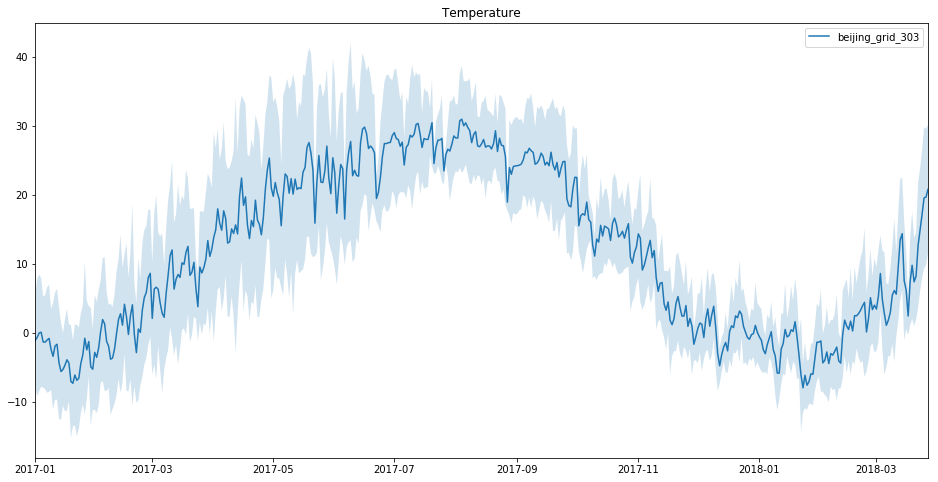

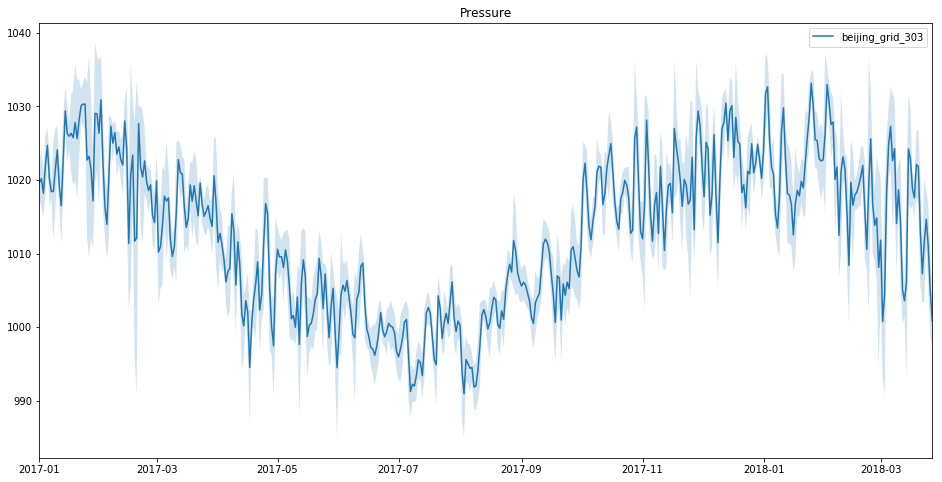

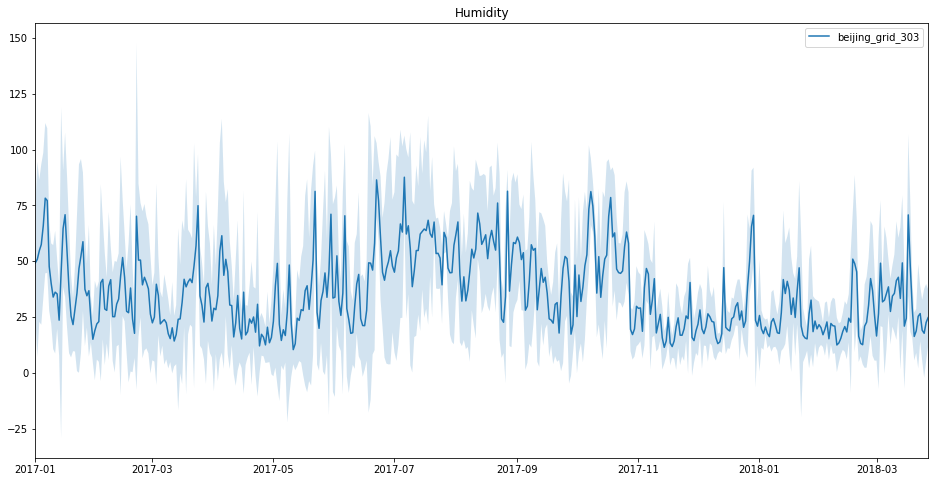

In [5]:
station_names = ['beijing_grid_303']
# w = weather.reset_index()
w = df_grid_selected.reset_index()
feature_names = w.columns[5:8]
for feature in feature_names:
    plt.figure(figsize=(16,8))
    for station in w.stationName.unique():
        resamples_mean = w[w['stationName'] == station].reset_index().set_index('datetime').resample('D').mean()[feature]
        resamples_std = w[w['stationName'] == station].reset_index().set_index('datetime').resample('D').std()[feature]
        if max(resamples_mean) > 1200:
            pass # There are some outliers. Might be due to bad collection of data
        else:    
            plt.plot(resamples_mean.index, resamples_mean, label = station)
            plt.fill_between(resamples_mean.index,
                         resamples_mean - 2.575 * resamples_std,
                         resamples_mean + 2.575 * resamples_std,
                 alpha=.2, label='99% confidence interval')
            y_perc = 99.
            plt.title(feature.title())
            plt.legend(station_names)
            plt.xlim([resamples_mean.index.min(),
                    resamples_mean.index.max()])

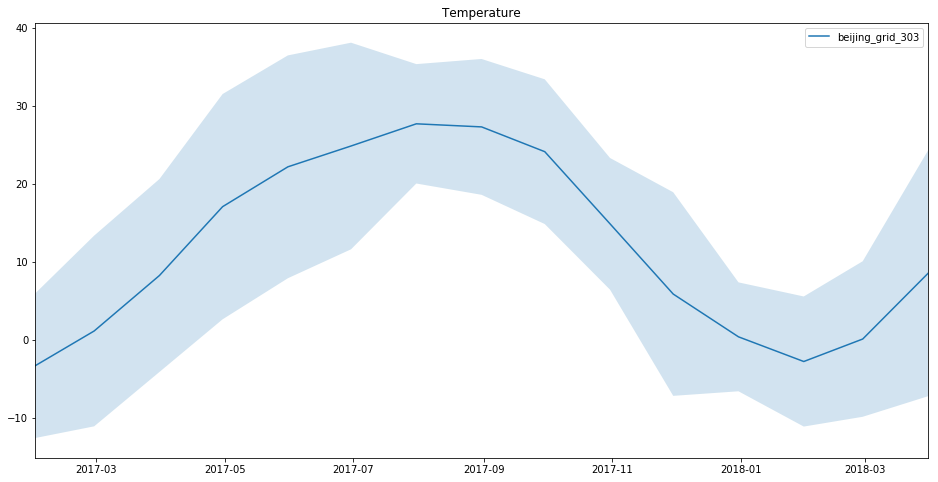

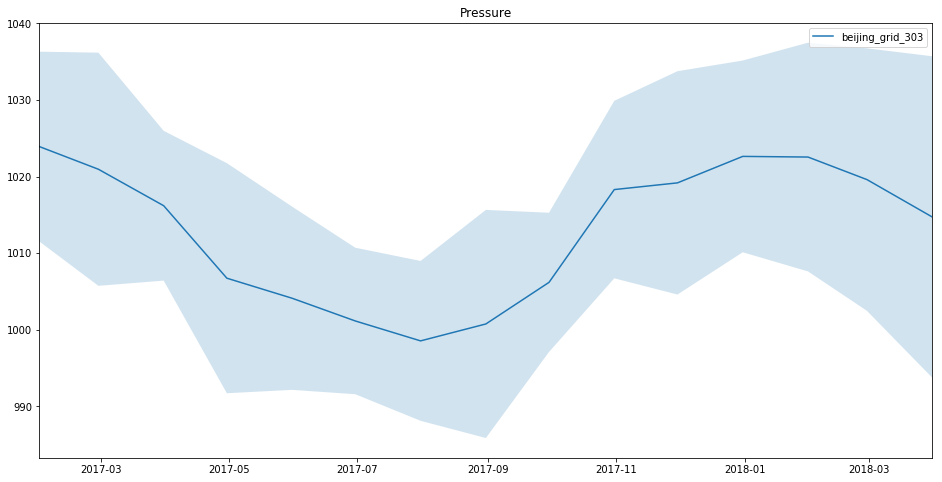

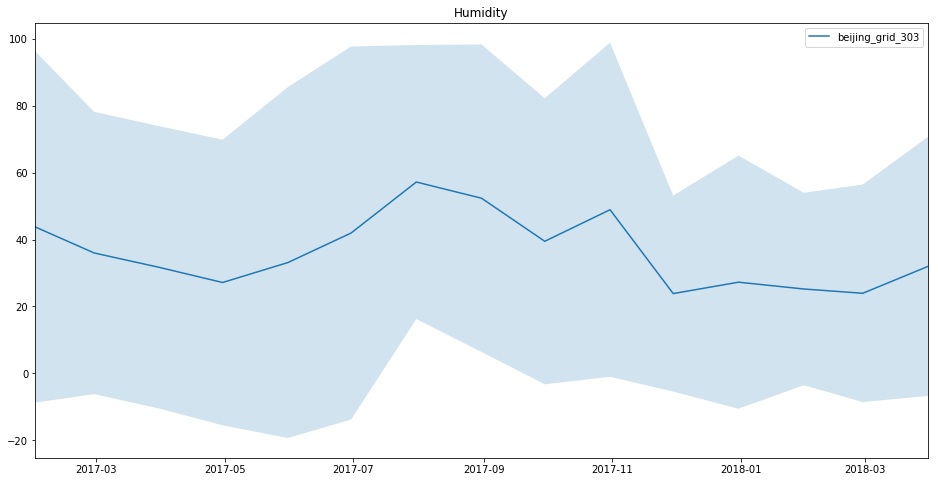

In [8]:
station_names = ['beijing_grid_303']
# w = weather.reset_index()
w = df_grid_selected.reset_index()
feature_names = w.columns[5:8]
for feature in feature_names:
    plt.figure(figsize=(16,8))
    for station in w.stationName.unique():
        resamples_mean = w[w['stationName'] == station].reset_index().set_index('datetime').resample('M').mean()[feature]
        resamples_std = w[w['stationName'] == station].reset_index().set_index('datetime').resample('M').std()[feature]
        if max(resamples_mean) > 1200:
            pass # There are some outliers
        else:
            plt.plot(resamples_mean.index, resamples_mean, label = station)
            plt.fill_between(resamples_mean.index,
                         resamples_mean - 2.575 * resamples_std,
                         resamples_mean + 2.575 * resamples_std,
                 alpha=.2, label='99% confidence interval')
            y_perc = 99.
            plt.title(feature.title())
            plt.legend(station_names)
            plt.xlim([resamples_mean.index.min(),
                    resamples_mean.index.max()])

In [15]:
df_grid_test = pd.read_csv(FILE_FOLDER%'gridWeather_20180501-20180502.csv')
df_grid_test_selected = df_grid_test
# df_grid_test_selected = df_grid_test[df_grid_test['station_id']=='beijing_grid_303']
# df_grid_selected = df_grid
df_grid_test_selected['datetime'] = pd.to_datetime(df_grid_test_selected['time'])
df_grid_test_selected.set_index(['station_id', 'datetime'], inplace=True)
df_grid_test_selected.head()

,,id,time,weather,temperature,pressure,humidity,wind_direction,wind_speed
station_id,datetime,,,,,,,,
beijing_grid_000,2018-05-01,3116510,2018-05-01 00:00:00,CLOUDY,20.0,975.6105,52.0,76.64,4.38
beijing_grid_001,2018-05-01,3116511,2018-05-01 00:00:00,CLOUDY,20.0,962.0873,49.0,58.35,3.82
beijing_grid_002,2018-05-01,3116512,2018-05-01 00:00:00,CLOUDY,13.0,948.5641,46.0,36.82,3.75
beijing_grid_003,2018-05-01,3116513,2018-05-01 00:00:00,CLOUDY,13.0,933.2105,43.0,9.52,4.65
beijing_grid_004,2018-05-01,3116514,2018-05-01 00:00:00,CLOUDY,13.0,916.0265,42.0,350.17,6.88


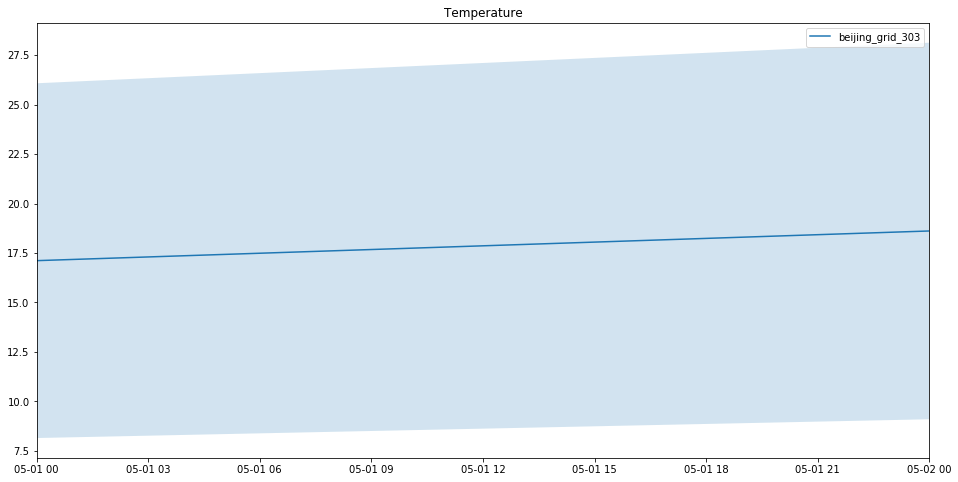

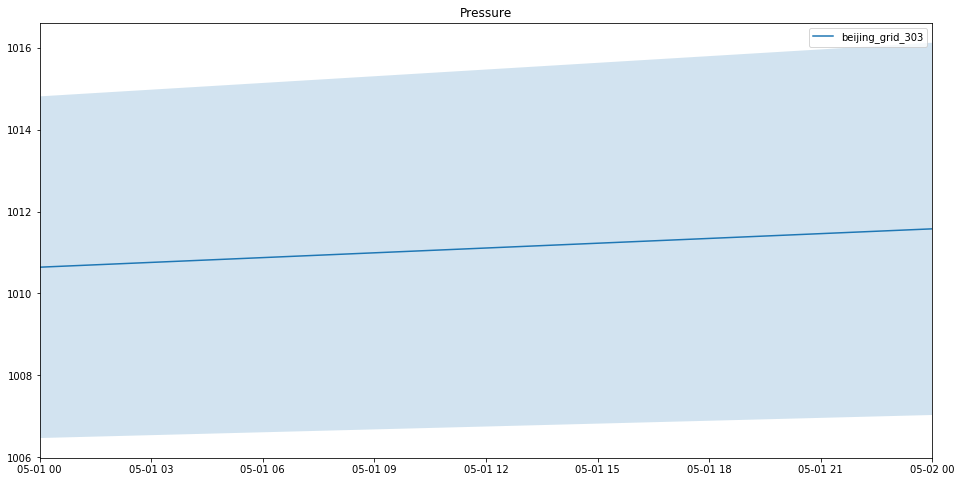

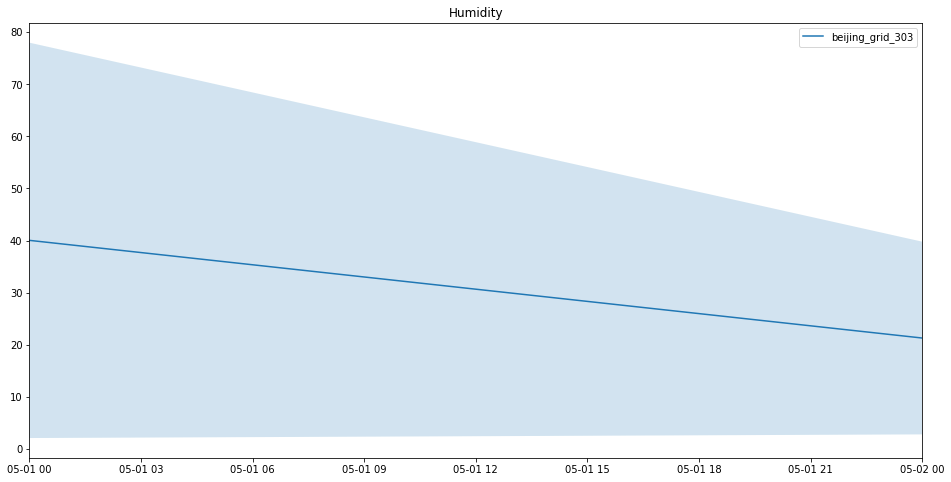

In [14]:
station_names = ['beijing_grid_303']
# w = weather.reset_index()
w = df_grid_test_selected.reset_index()
feature_names = w.columns[5:8]
for feature in feature_names:
    plt.figure(figsize=(16,8))
    for station in w.station_id.unique():
        resamples_mean = w[w['station_id'] == station].reset_index().set_index('datetime').resample('D').mean()[feature]
        resamples_std = w[w['station_id'] == station].reset_index().set_index('datetime').resample('D').std()[feature]
        if max(resamples_mean) > 1200:
            pass # There are some outliers. Might be due to bad collection of data
        else:    
            plt.plot(resamples_mean.index, resamples_mean, label = station)
            plt.fill_between(resamples_mean.index,
                         resamples_mean - 2.575 * resamples_std,
                         resamples_mean + 2.575 * resamples_std,
                 alpha=.2, label='99% confidence interval')
            y_perc = 99.
            plt.title(feature.title())
            plt.legend(station_names)
            plt.xlim([resamples_mean.index.min(),
                    resamples_mean.index.max()])

In [17]:
df_ow = pd.read_csv(FILE_FOLDER%'observedWeather_20180501-20180502.csv')
# df_ow.head()
df_ow['datetime'] = pd.to_datetime(df_ow['time'])
df_ow.set_index(['station_id', 'datetime'], inplace=True)
df_ow.head()

,,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
station_id,datetime,,,,,,,,
shunyi_meo,2018-05-01,3118024,2018-05-01 00:00:00,Sunny/clear,18.7,1011.3,58.0,2.7,359.0
hadian_meo,2018-05-01,3118025,2018-05-01 00:00:00,Sunny/clear,19.8,1008.8,33.0,2.1,22.0
yanqing_meo,2018-05-01,3118026,2018-05-01 00:00:00,Sleet,15.6,959.0,42.0,2.7,138.0
miyun_meo,2018-05-01,3118027,2018-05-01 00:00:00,Hail,18.3,1006.9,38.0,4.0,40.0
huairou_meo,2018-05-01,3118028,2018-05-01 00:00:00,Sleet,19.3,1005.8,34.0,6.5,43.0


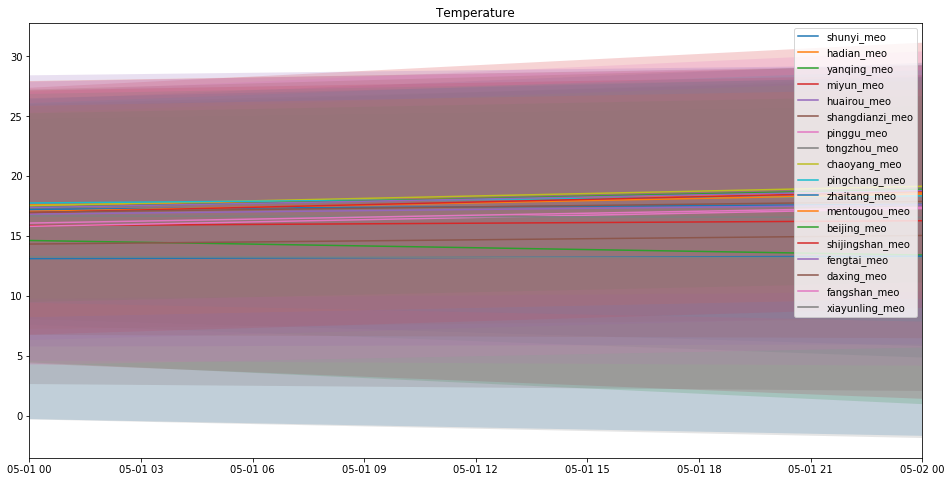

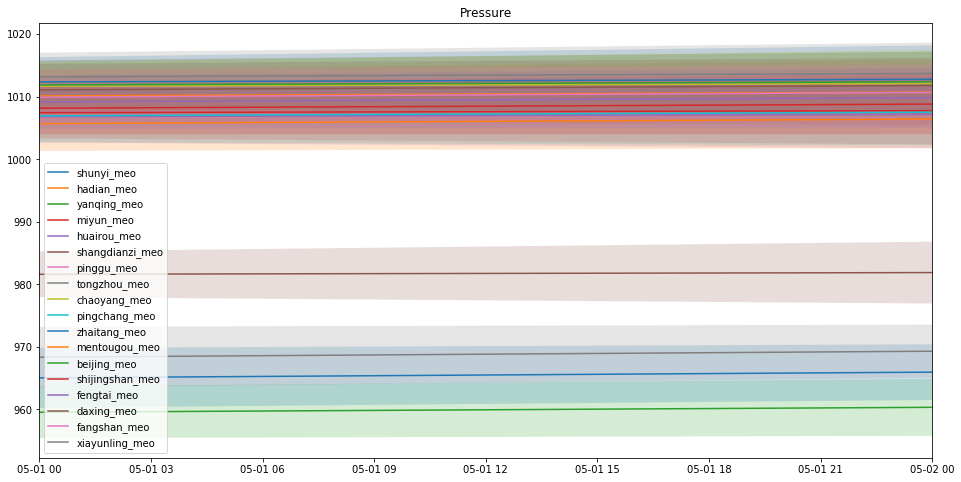

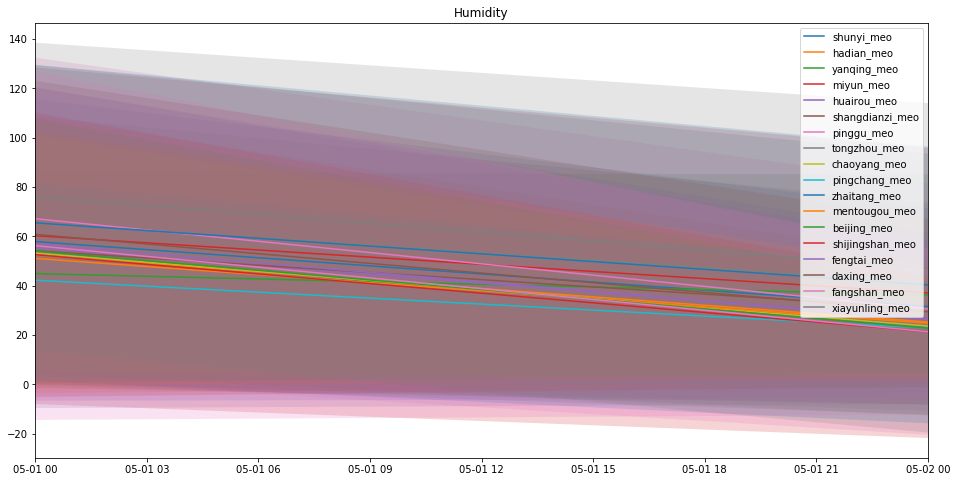

In [18]:
station_names = df_ow.reset_index()['station_id'].unique().tolist()
# w = weather.reset_index()
w = df_ow.reset_index()
feature_names = w.columns[5:8]
for feature in feature_names:
    plt.figure(figsize=(16,8))
    for station in w.station_id.unique():
        resamples_mean = w[w['station_id'] == station].reset_index().set_index('datetime').resample('D').mean()[feature]
        resamples_std = w[w['station_id'] == station].reset_index().set_index('datetime').resample('D').std()[feature]
        if max(resamples_mean) > 1200:
            pass # There are some outliers. Might be due to bad collection of data
        else:    
            plt.plot(resamples_mean.index, resamples_mean, label = station)
            plt.fill_between(resamples_mean.index,
                         resamples_mean - 2.575 * resamples_std,
                         resamples_mean + 2.575 * resamples_std,
                 alpha=.2, label='99% confidence interval')
            y_perc = 99.
            plt.title(feature.title())
            plt.legend(station_names)
            plt.xlim([resamples_mean.index.min(),
                    resamples_mean.index.max()])

In [19]:
def plot_data_dailly(df,station_names,name_id):
    # w = weather.reset_index()
    w = df.reset_index()
    feature_names = w.columns[5:8]
    for feature in feature_names:
        plt.figure(figsize=(16,8))
        for station in station_names:
            resamples_mean = w[w[name_id] == station].reset_index().set_index('datetime').resample('D').mean()[feature]
            resamples_std = w[w[name_id] == station].reset_index().set_index('datetime').resample('D').std()[feature]
            if max(resamples_mean) > 1200:
                pass # There are some outliers. Might be due to bad collection of data
            else:    
                plt.plot(resamples_mean.index, resamples_mean, label = station)
                plt.fill_between(resamples_mean.index,
                             resamples_mean - 2.575 * resamples_std,
                             resamples_mean + 2.575 * resamples_std,
                     alpha=.2, label='99% confidence interval')
                y_perc = 99.
                plt.title(feature.title())
                plt.legend(station_names)
                plt.xlim([resamples_mean.index.min(),
                        resamples_mean.index.max()])

In [22]:
df_ow = pd.read_csv(FILE_FOLDER%'observedWeather_201701-201801.csv')
df_ow.head()
df_ow['datetime'] = pd.to_datetime(df_ow['utc_time'])
df_ow.set_index(['station_id', 'datetime'], inplace=True)
df_ow.head()

longitude   latitude             utc_time  \
station_id datetime                                                          
shunyi_meo 2017-01-30 16:00:00  116.615278  40.126667  2017-01-30 16:00:00   
           2017-01-30 17:00:00  116.615278  40.126667  2017-01-30 17:00:00   
           2017-01-30 18:00:00  116.615278  40.126667  2017-01-30 18:00:00   
           2017-01-30 19:00:00  116.615278  40.126667  2017-01-30 19:00:00   
           2017-01-30 20:00:00  116.615278  40.126667  2017-01-30 20:00:00   

                                temperature  pressure  humidity  \
station_id datetime                                               
shunyi_meo 2017-01-30 16:00:00         -1.7    1028.7        15   
           2017-01-30 17:00:00         -3.5    1028.4        24   
           2017-01-30 18:00:00         -3.7    1028.1        27   
           2017-01-30 19:00:00         -3.9    1027.6        27   
           2017-01-30 20:00:00         -4.1    1026.7        26   

                                wind_direction  wind_speed      weather  
station_id datetime                                                      
shunyi_meo 2017-01-30 16:00:00           215.0         1.6  Sunny/clear  
           2017-01-30 17:00:00            16.0         1.0         Haze  
           2017-01-30 18:00:00            32.0         1.1         Haze  
           2017-01-30 19:00:00            21.0         0.9         Haze  
           2017-01-30 20:00:00            17.0         1.1         Haze

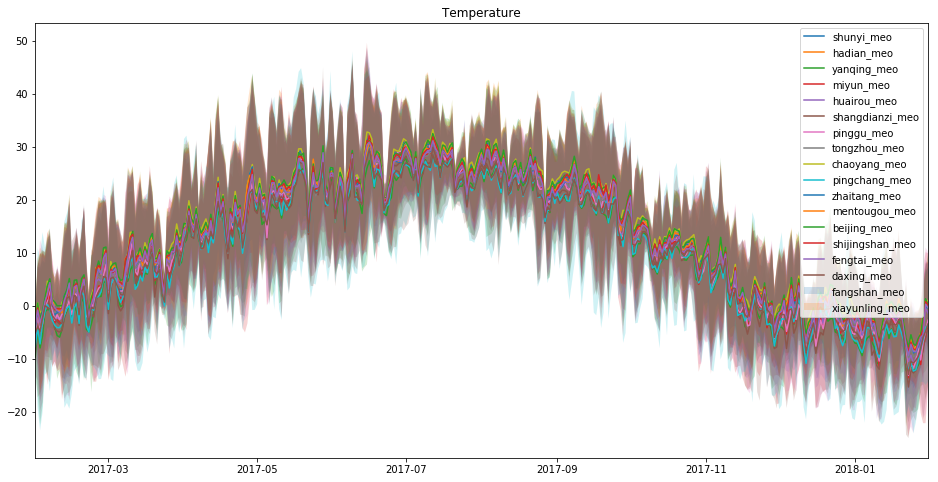

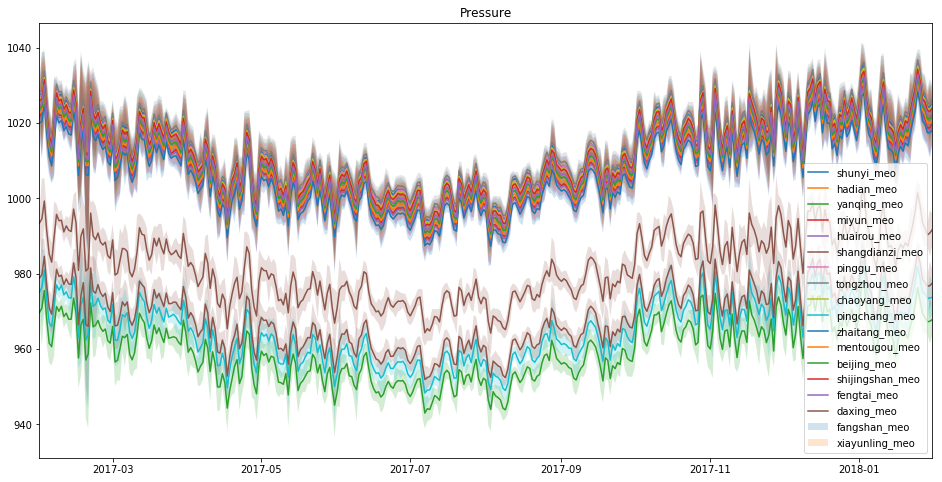

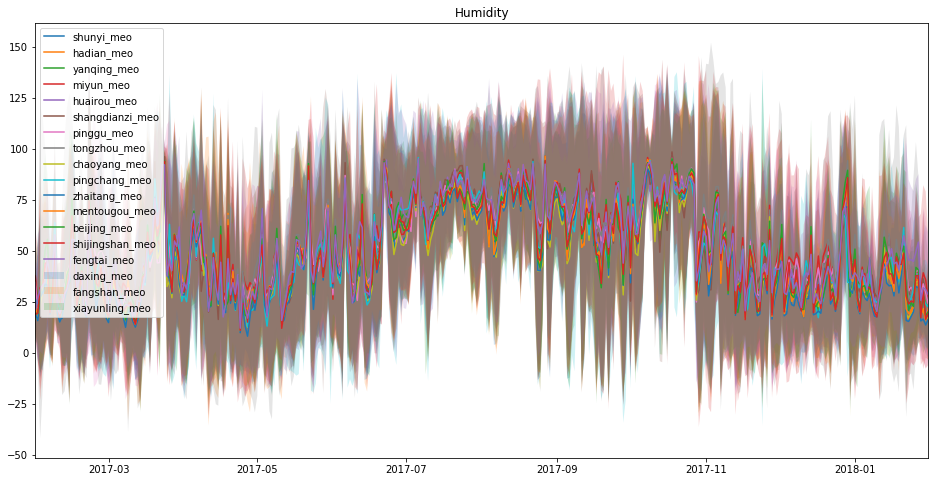

In [23]:
plot_data_dailly(df_ow,df_ow.reset_index()['station_id'].unique().tolist(),'station_id')

In [ ]:
2017 3, 4, 5, 6 7
2018 3, 4